In [3]:
import torch
import os
import glob
import matplotlib.pyplot as plt

import queue

import threading

from tqdm.notebook import tqdm

from collections import namedtuple

import time

import random

In [4]:
import cv2 
import numpy as np
from PIL import Image

In [5]:
import torch
import torch.functional as F
import torch.nn as nn

In [6]:
Batch = namedtuple('batch', ('before', 'after'))

In [7]:
emoticon_file_list = glob.glob('resource/*.png')
emoticon_file_list.sort()

In [9]:
# Remove white images

for file in tqdm(emoticon_file_list):
    
    image = cv2.imread(file)
    
    if np.min(image) == 255:
        print(file)
        image = image[:, :, (2, 1, 0)]
        plt.figure()
        plt.imshow(image)
        plt.show()
        os.remove(file)

In [62]:
for file in tqdm(emoticon_file_list):
    
    image = cv2.imread(file)
    
    image = image[:, :, (2, 1, 0)]
        
    if image.shape[0] != image.shape[1]:
        
        white_image = np.ones((124, 124, 3), dtype=np.uint8) * 255
        white_image[:image.shape[0], :image.shape[1], :image.shape[2]] = image
        
        plt.figure()
        plt.imshow(white_image)
        plt.show()
        print(file)
        
        im = Image.fromarray(white_image)
        im.save(file)

    break

In [ ]:
def punch_image(image, p=0.1):
    
    bool_mask = np.random.choice((True, False), image.shape[1:3], True, (1-p, p))
    bool_mask = np.stack([bool_mask, bool_mask, bool_mask], axis=0)
    
    punched_image= np.where(bool_mask, image, np.ones(image.shape))
    
    return punched_image

In [1]:
from scipy.ndimage import gaussian_filter

def blur_image(image, sigma=0.5):
    
    bool_mask = np.random.choice((True, False), image.shape[1:3], True, (1-p, p))
    
    punched_image= np.where(bool_mask, image, np.ones(image.shape))
    
    return blurred_image

0.0
0.5875203947569307
67.82240025810911
62.68277856155942
59.79516389329655
57.55903057120134
56.52424457605822
56.42324246182901


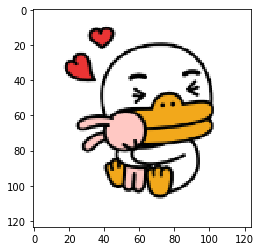

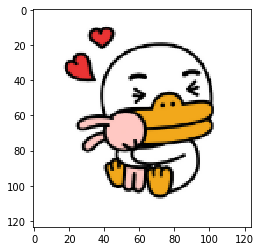

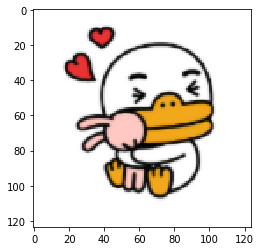

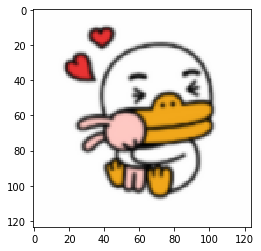

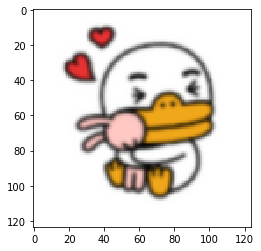

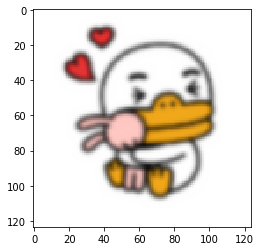

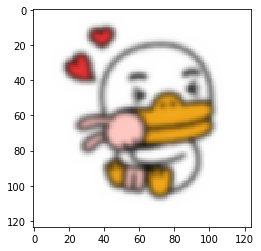

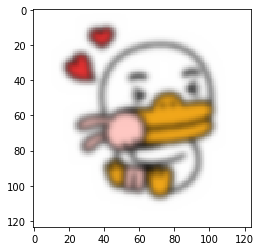

In [64]:
last_blurred_image = image

for sigma in np.arange(0, 2, 0.25):
    blurred_image = gaussian_filter(image, sigma = (sigma, sigma, 0))
    plt.figure()
    plt.imshow(blurred_image)
    
    print(np.std(image - blurred_image))

In [65]:
def make_seed_image(image):
    
    return seed_image

In [70]:
seed_pos = image.shape[0], image.shape[1]

In [77]:
width = image.shape[0]
height = image.shape[1]

seed_pos = (np.random.randint(1/3 * width, 2/3 * width), np.random.randint(1/3 * height, 2/3 * height))

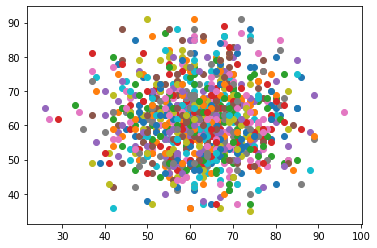

In [86]:
plt.figure()
for i in range(1000):
    seed_pos = (np.random.randint(1/3 * width, 2/3 * width), np.random.randint(1/3 * height, 2/3 * height))
    seed_pos = (int(np.random.normal(width/2, width/12)), int(np.random.normal(height/2, height/12)))
    plt.scatter(*seed_pos)
plt.show()

In [89]:
image[seed_pos]

array([242, 168,  27], dtype=uint8)

In [90]:
# plt.imshow(image)

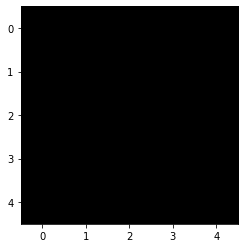

In [93]:
matrix = np.zeros((5, 5, 3))

plt.imshow(matrix)

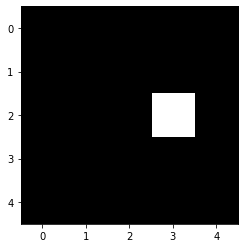

In [94]:
matrix = np.zeros((5, 5, 3))
matrix[2, 3] = 1

plt.imshow(matrix)

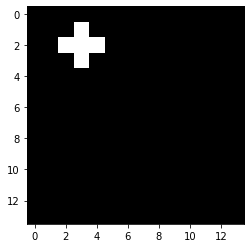

In [96]:
matrix = np.zeros((14, 14, 3))



plt.imshow(matrix)

In [99]:
pos = (5, 6)